In [3]:
import importlib
import matplotlib
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import FormatStrFormatter
font = {#'family' : 'normal',
    #'weight' : 'normal',
    'size'   : 16}
matplotlib.rc('font', **font)

H = importlib.import_module("core.helper_functions")
full_plot = H.full_plot

# Splice

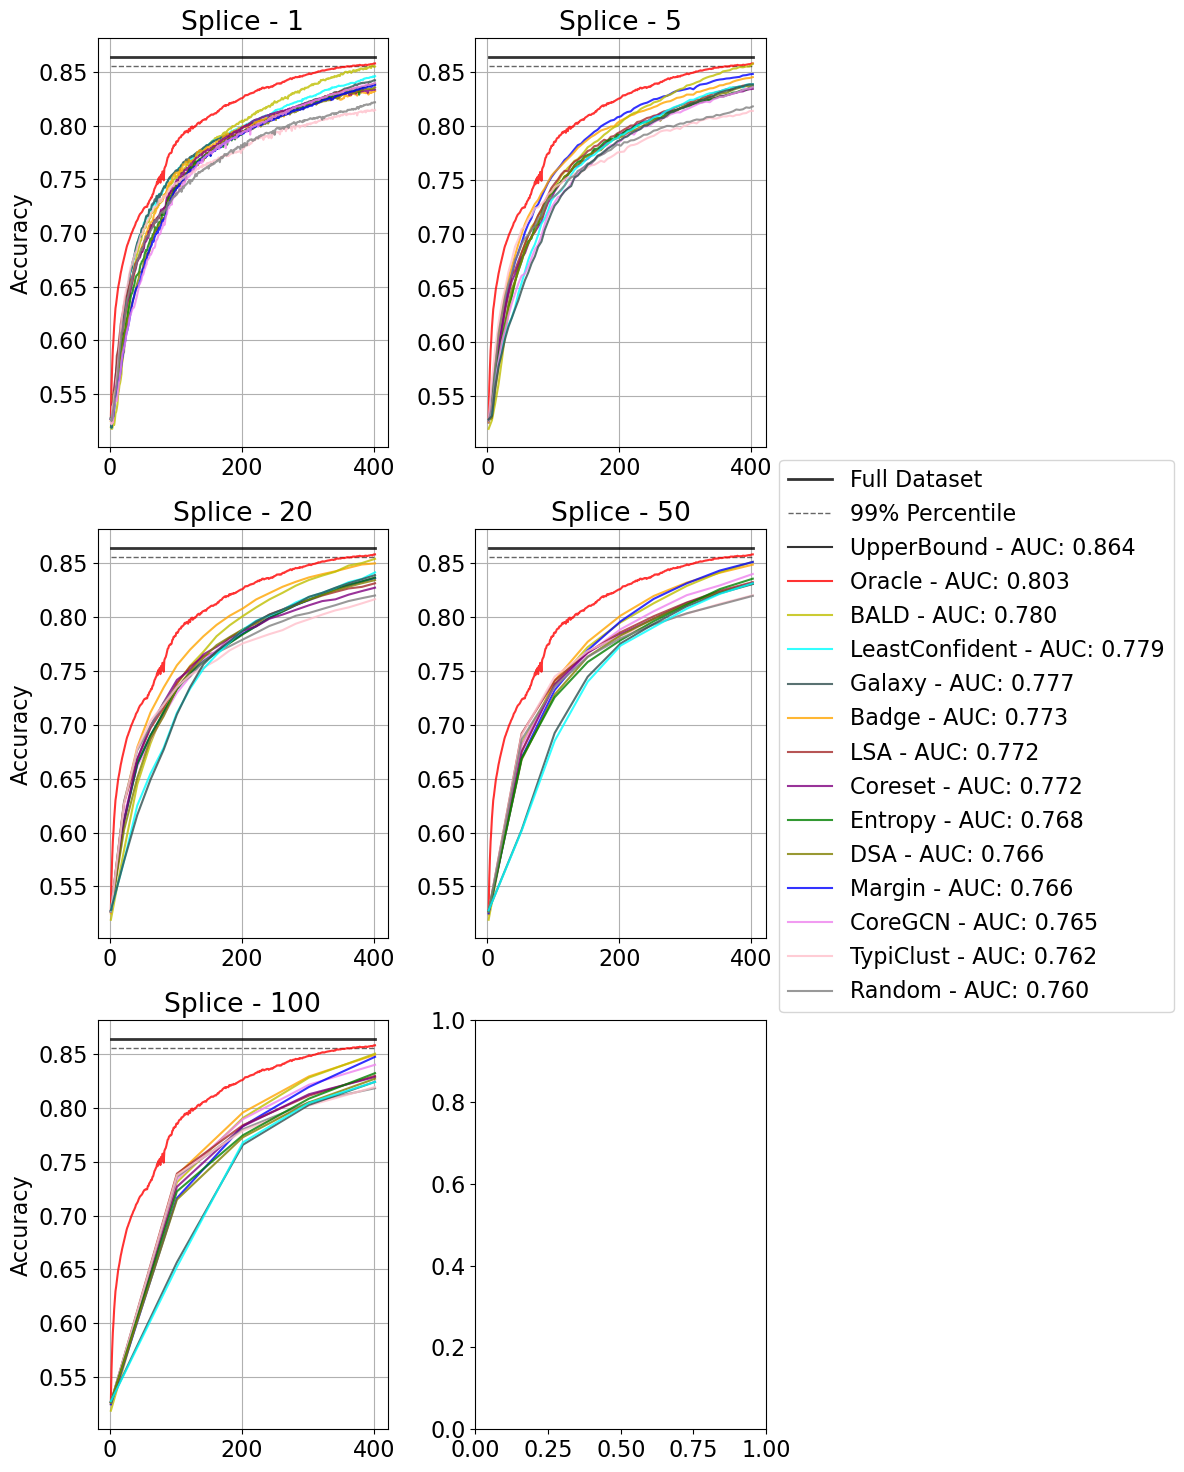

In [2]:
full_plot("Splice", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_splice.pdf")
plt.show()

# DNA

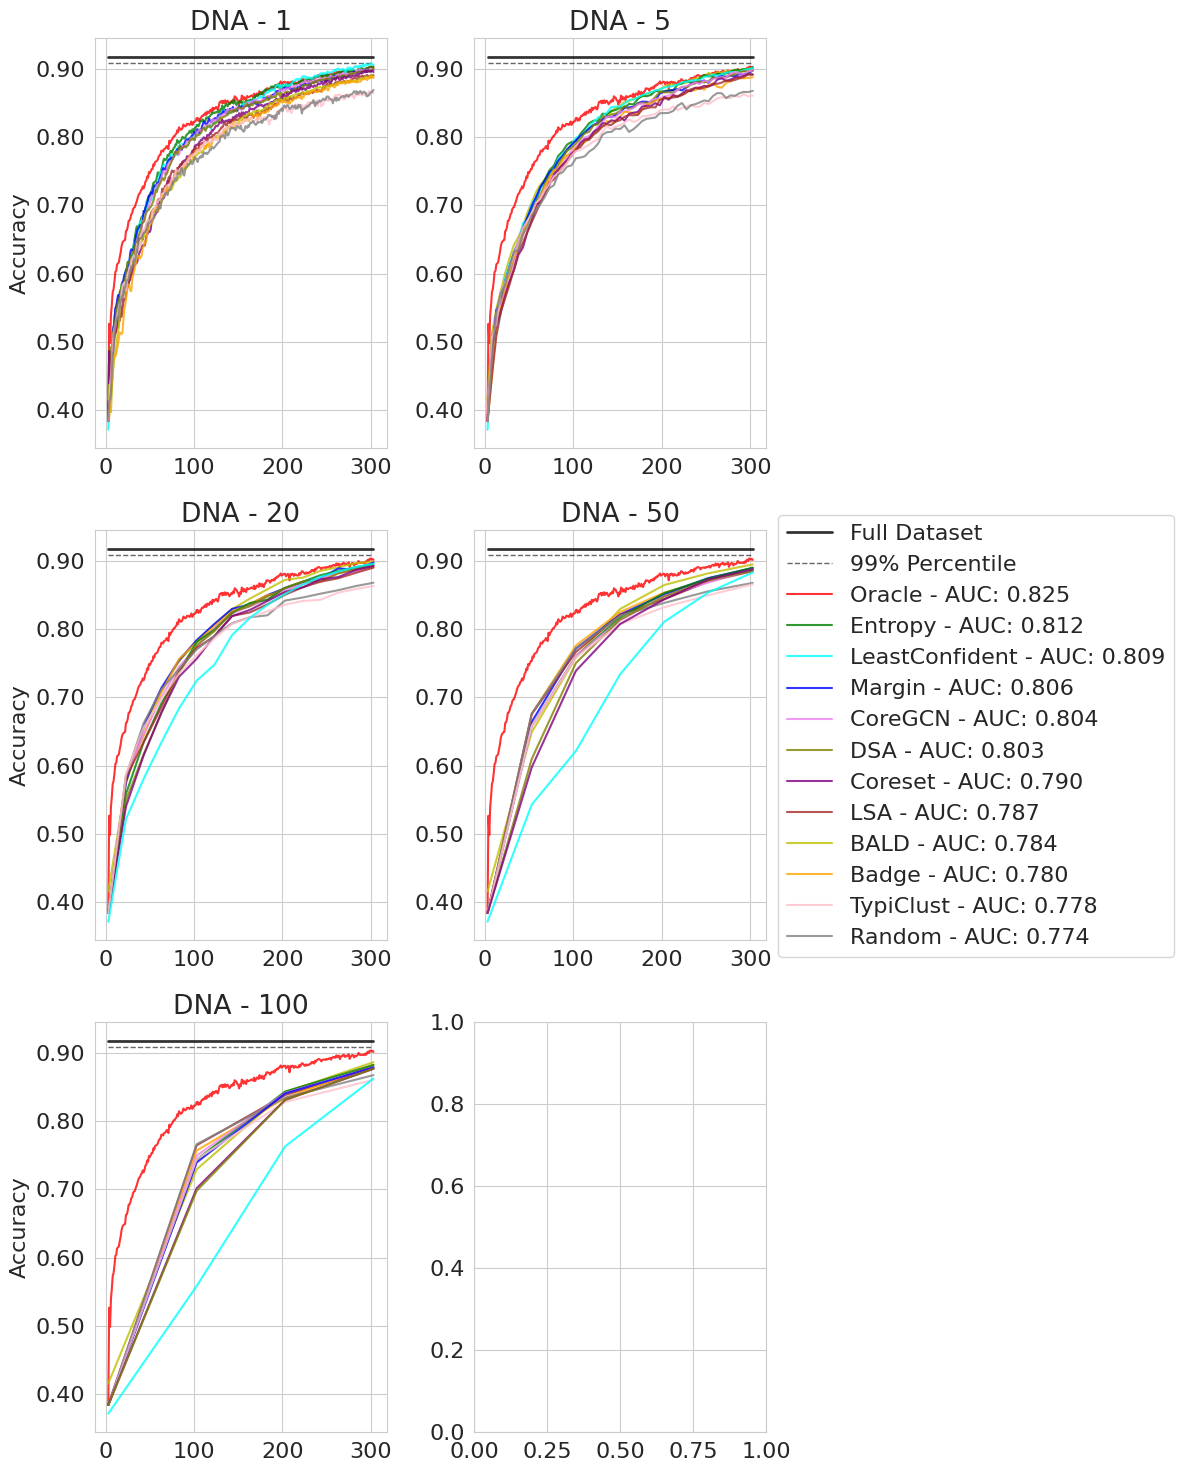

In [23]:
full_plot("DNA", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_dna.pdf")
plt.show()

# USPS

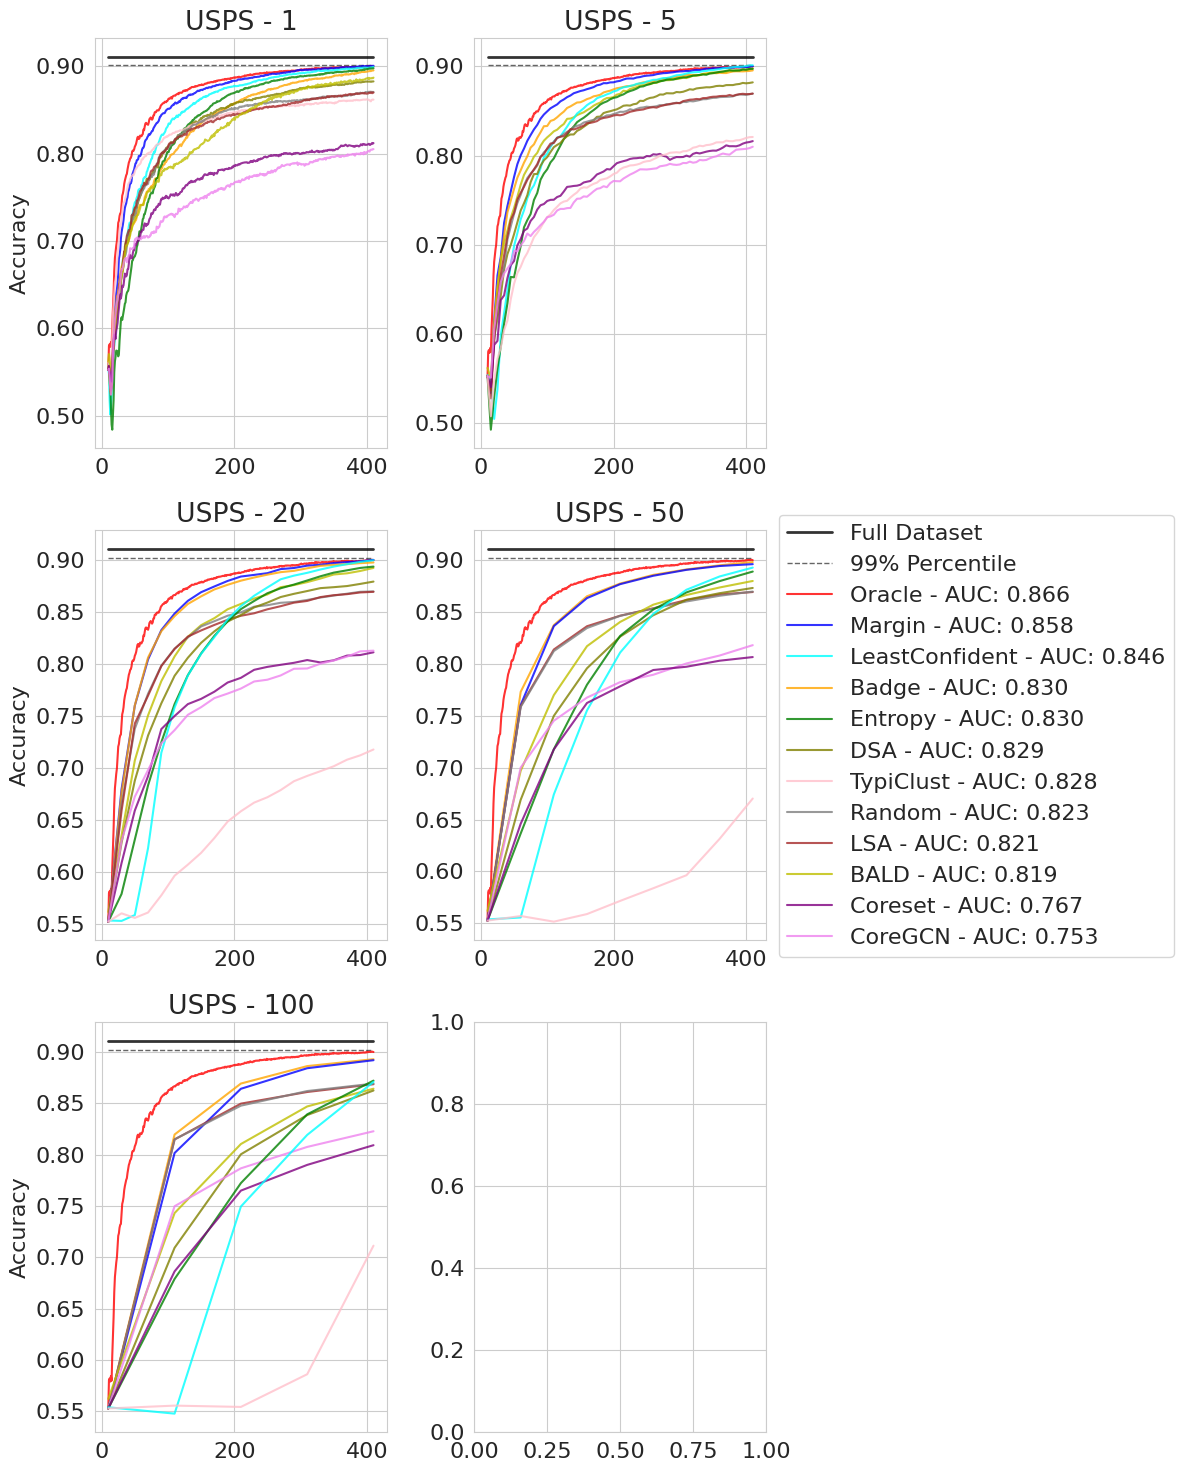

In [24]:
full_plot("USPS", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_usps.pdf")
plt.show()

# Cifar10 Encoded

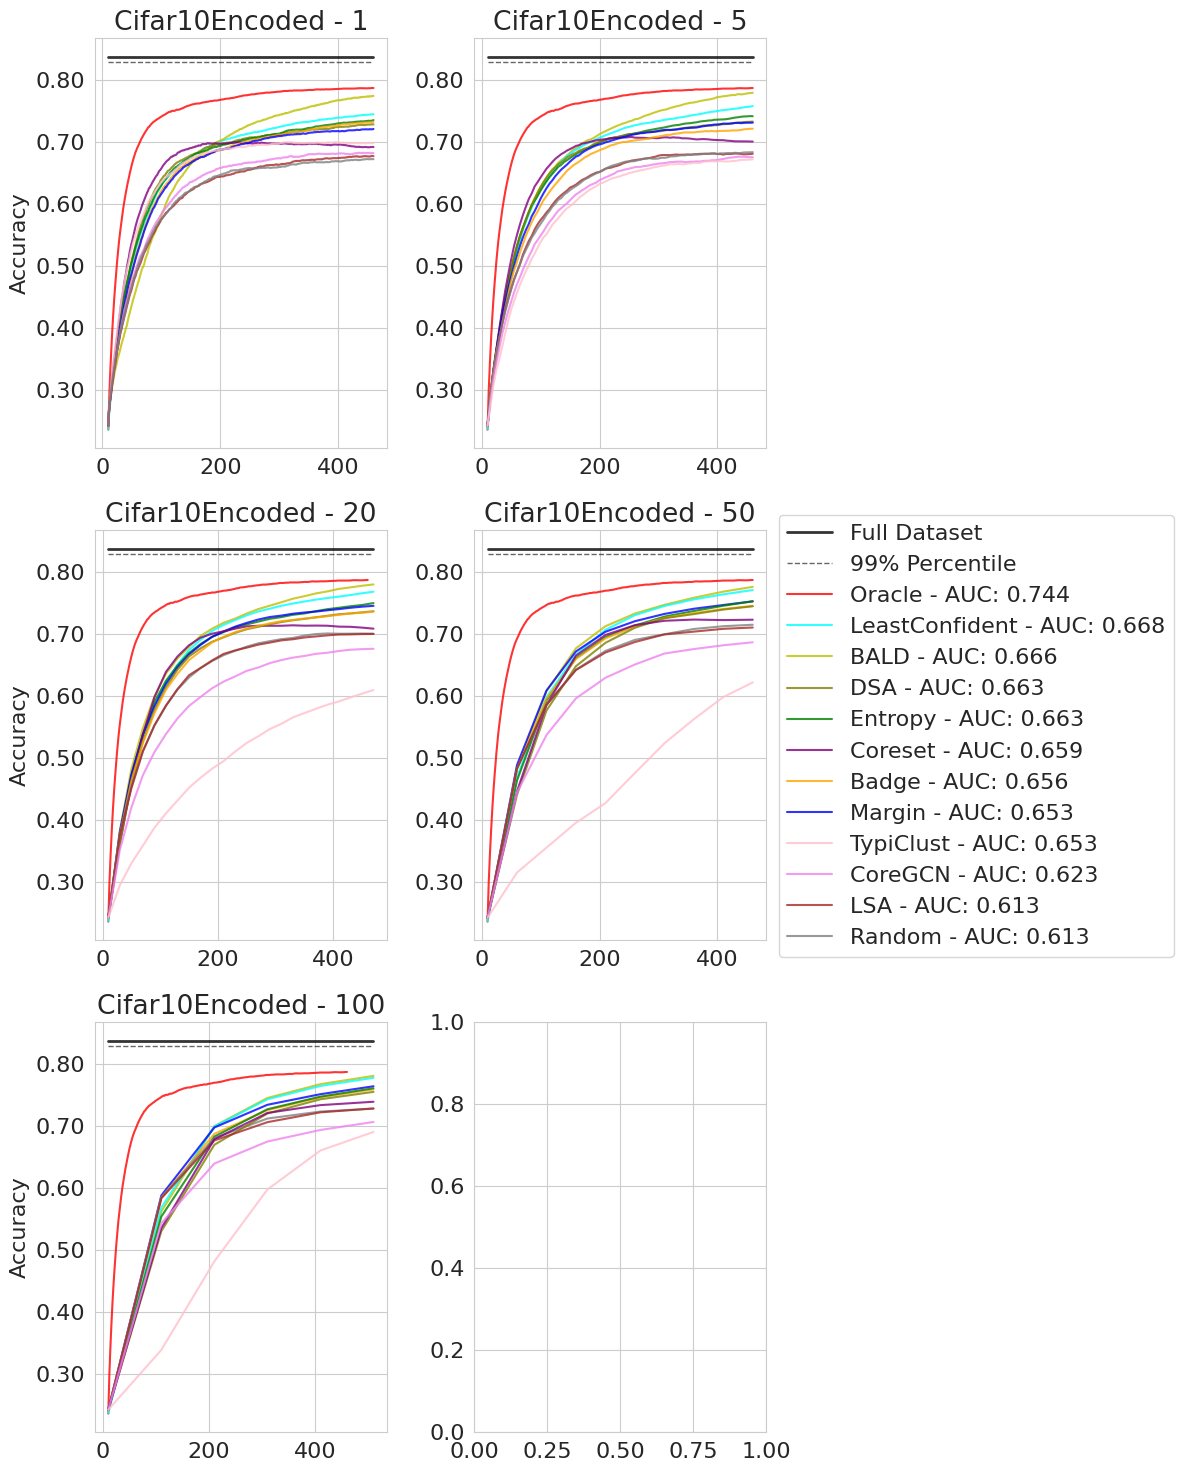

In [25]:
# Oracle, CoreGCN
full_plot("Cifar10Encoded", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_cifar10_enc.pdf")
plt.show()

# FashionMnist Encoded

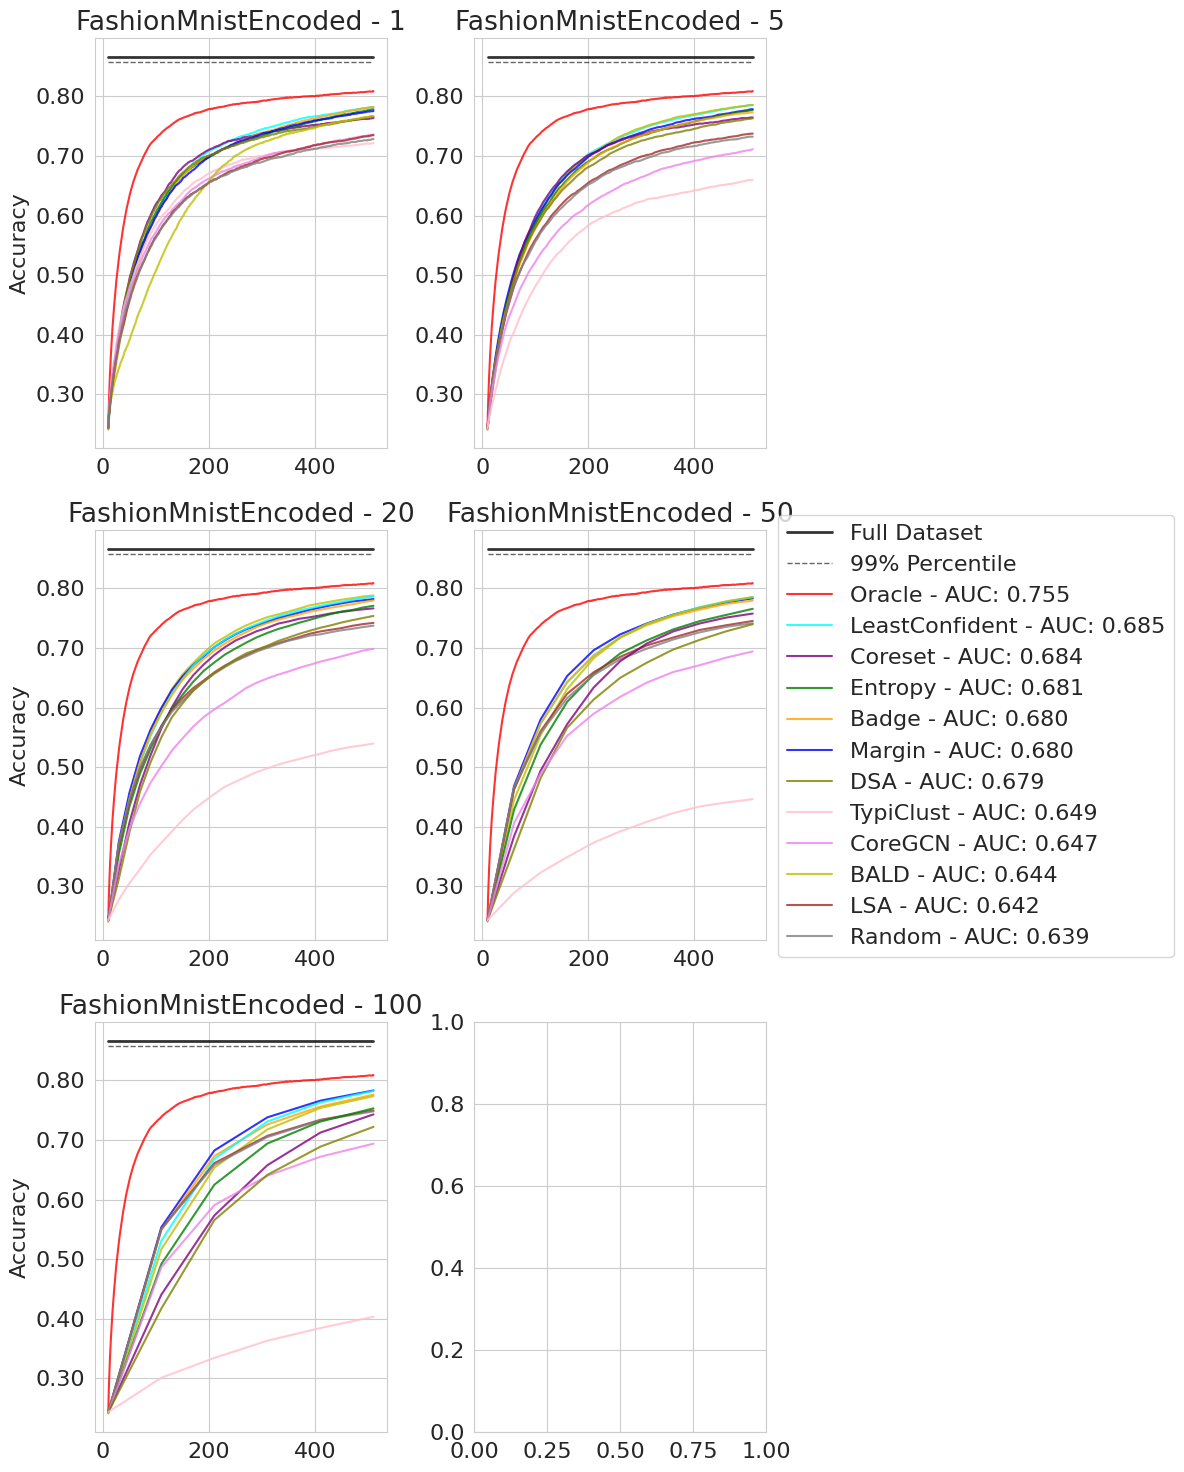

In [26]:
# Oracle, CoreGCN
full_plot("FashionMnistEncoded", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_fmnist_enc.pdf")
plt.show()

# TopV2

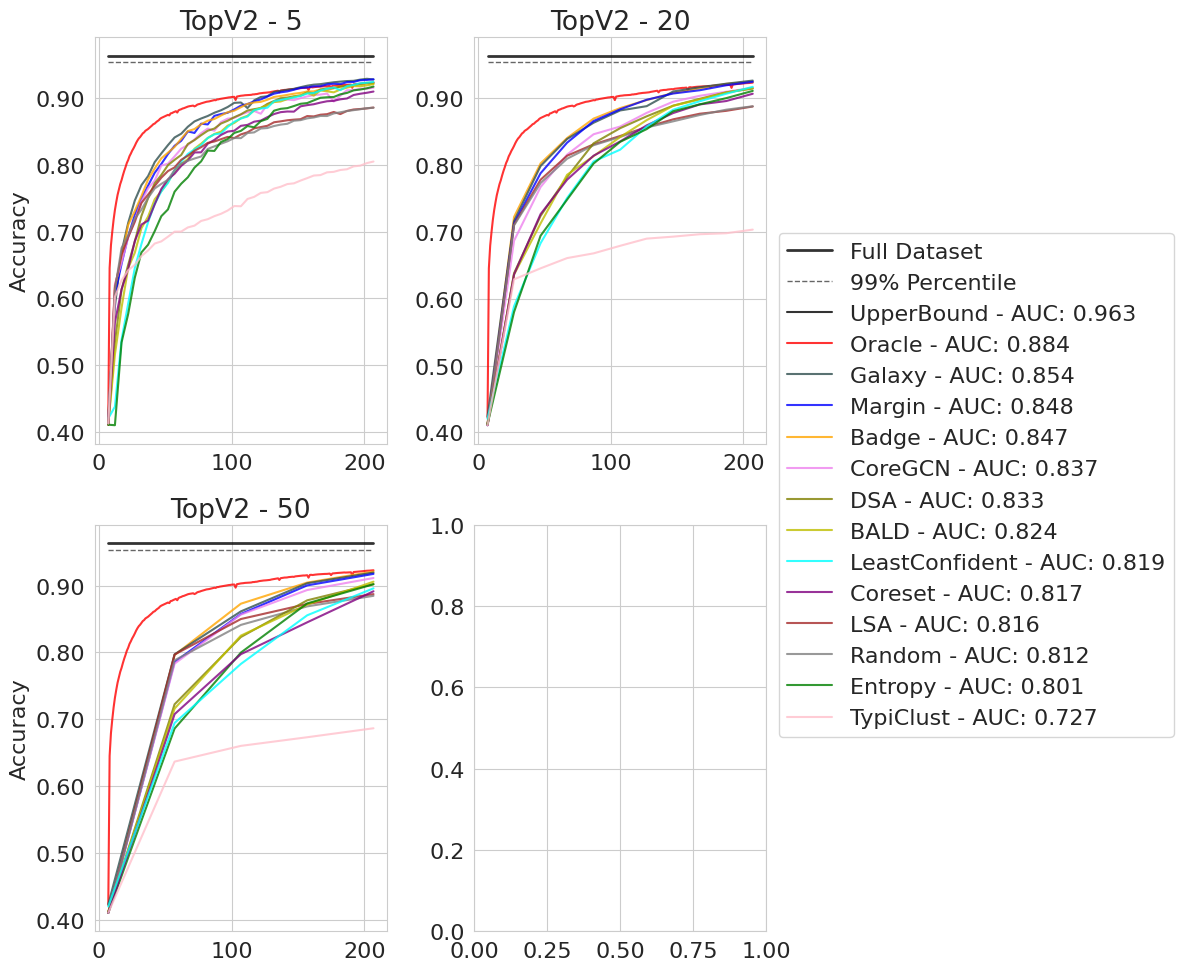

In [2]:
# Oracle, CoreGCN
full_plot("TopV2", query_size=[5, 20, 50], radjust=0.65)
plt.savefig("doc/img/eval_topv2.pdf")
plt.show()

# News

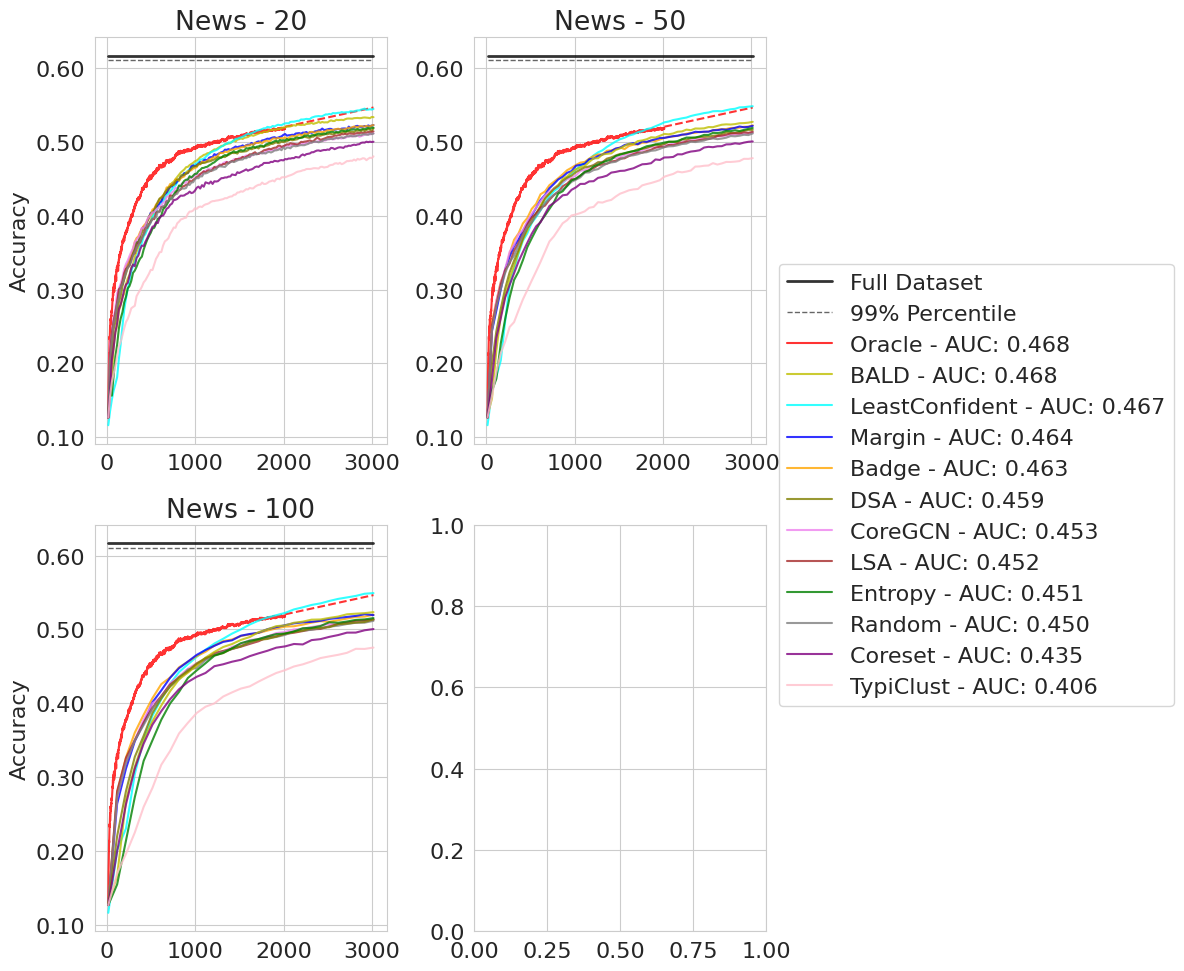

In [28]:
# Oracle, CoreGCN
full_plot("News", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_news.pdf")
plt.show()

# Splice Embedded

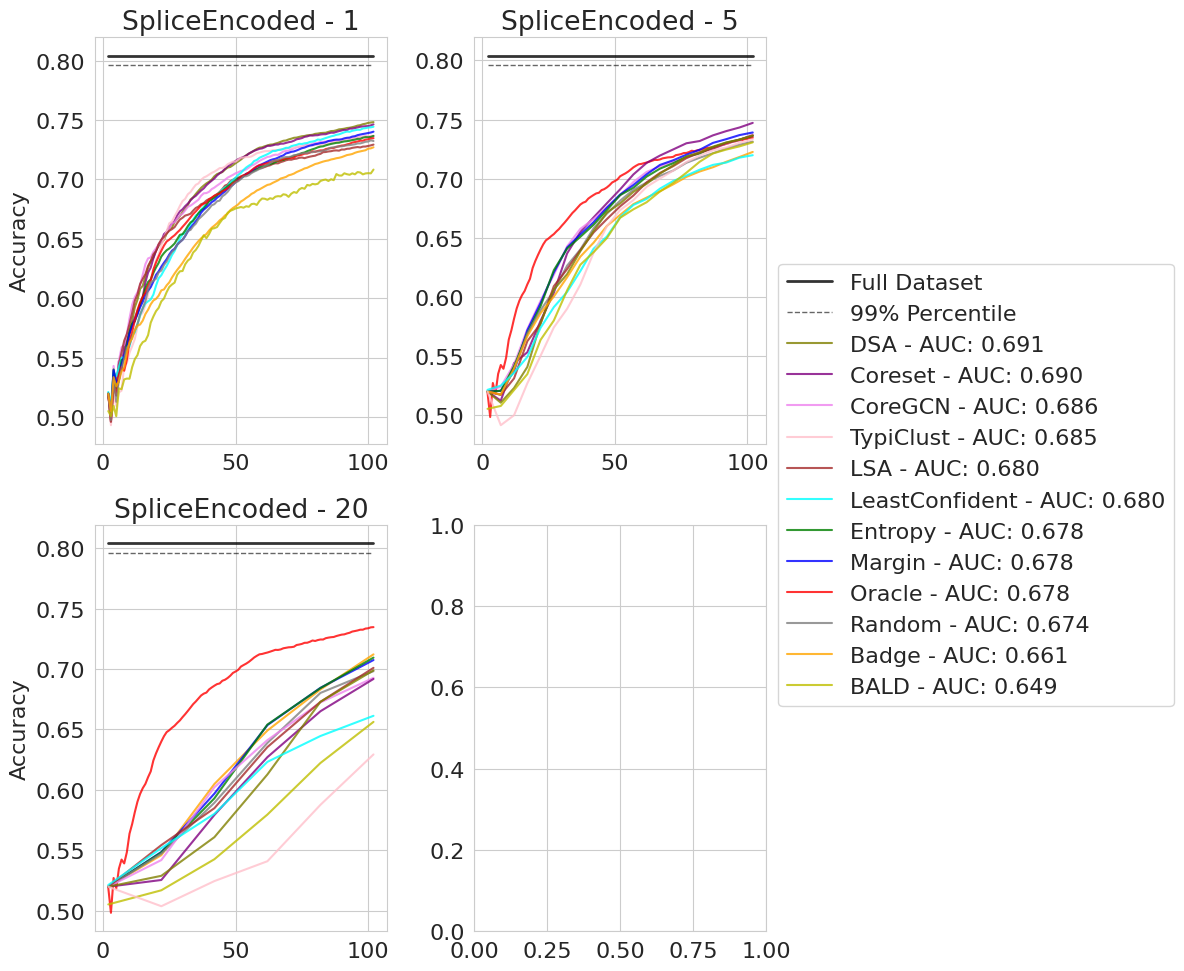

In [29]:
# Oracle, CoreGCN
full_plot("SpliceEncoded", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_splice_enc.pdf")
plt.show()

# DNA Embedded

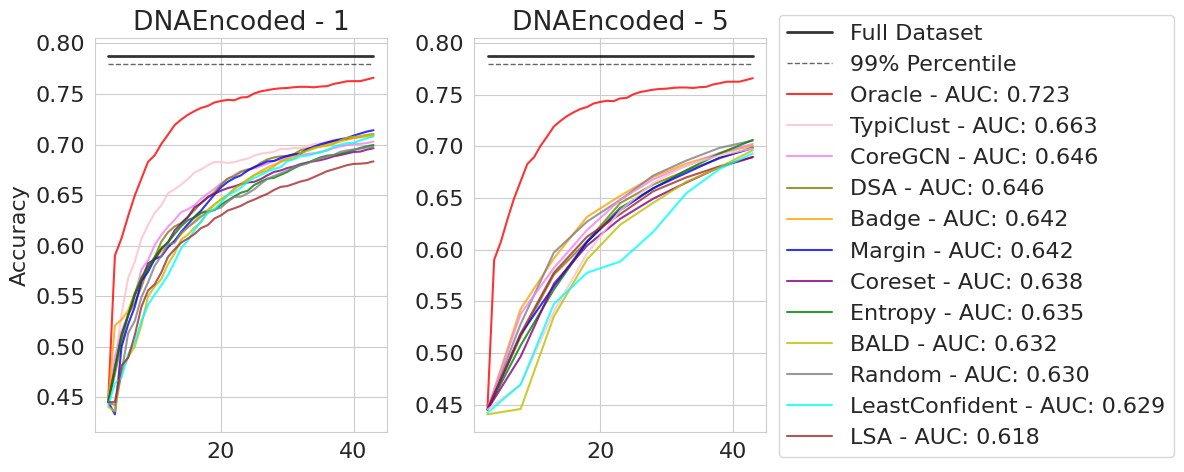

In [30]:
full_plot("DNAEncoded", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_dna_enc.pdf")
plt.show()


# USPS Embedded

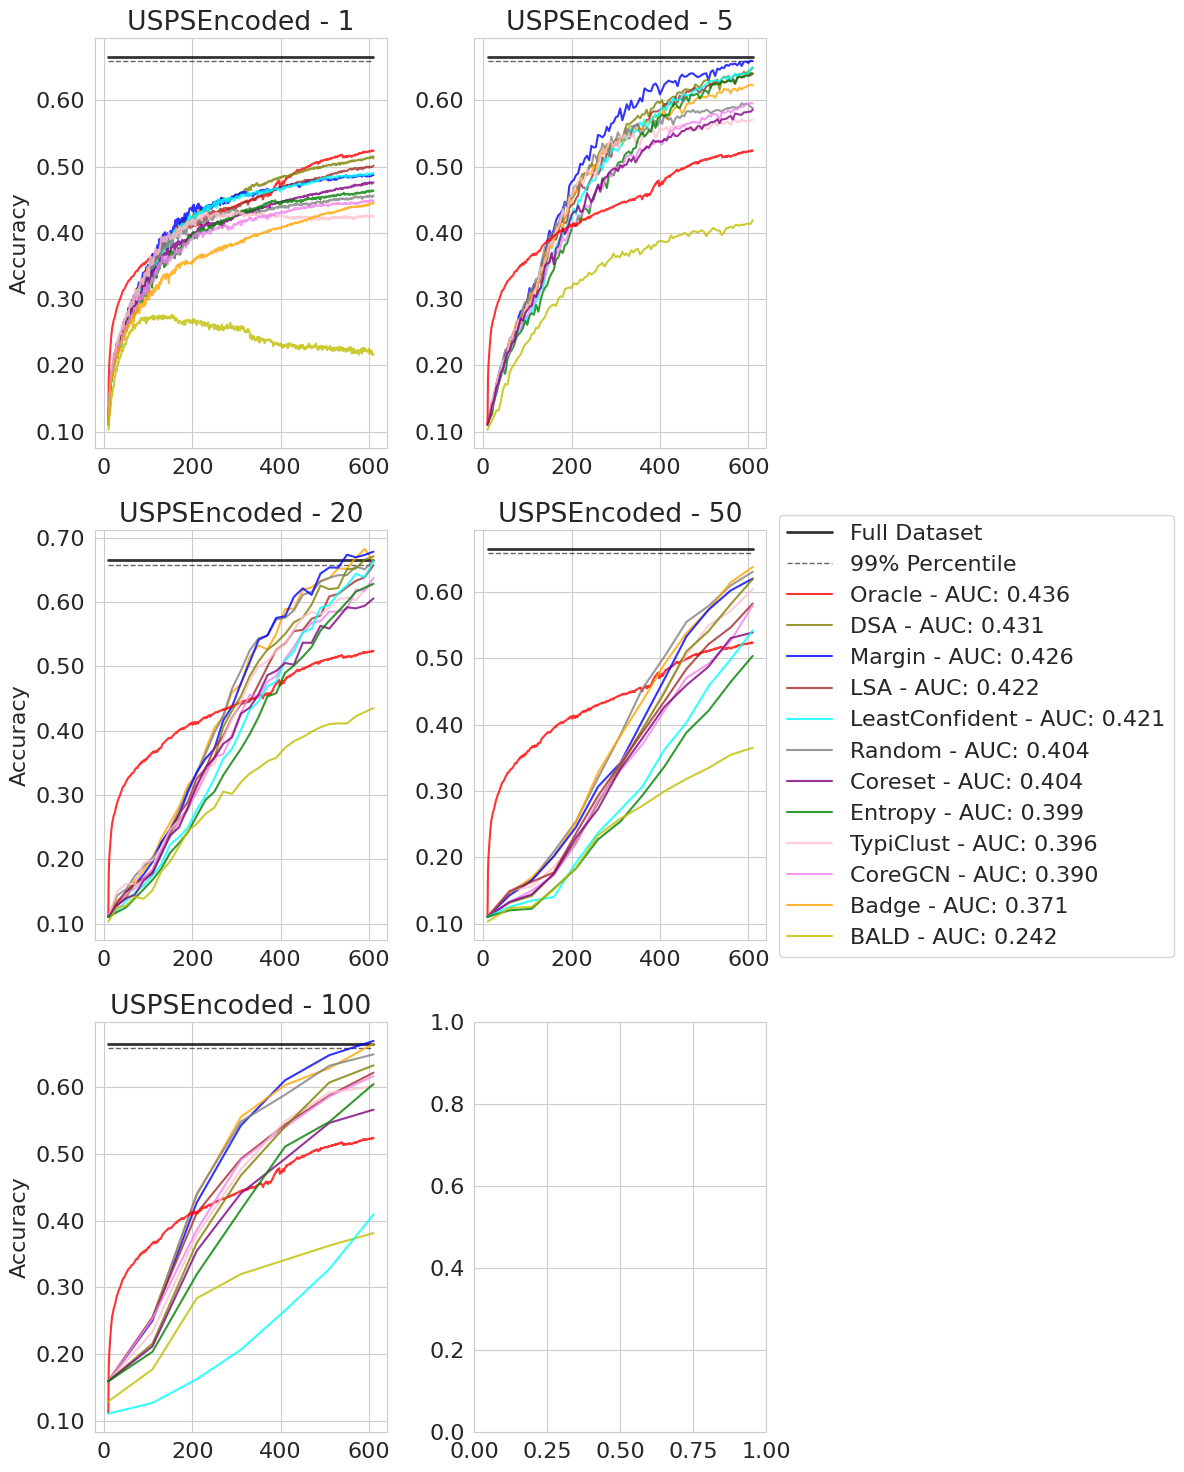

In [31]:
full_plot("USPSEncoded", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_usps_enc.pdf")
plt.show()

# Cifar10

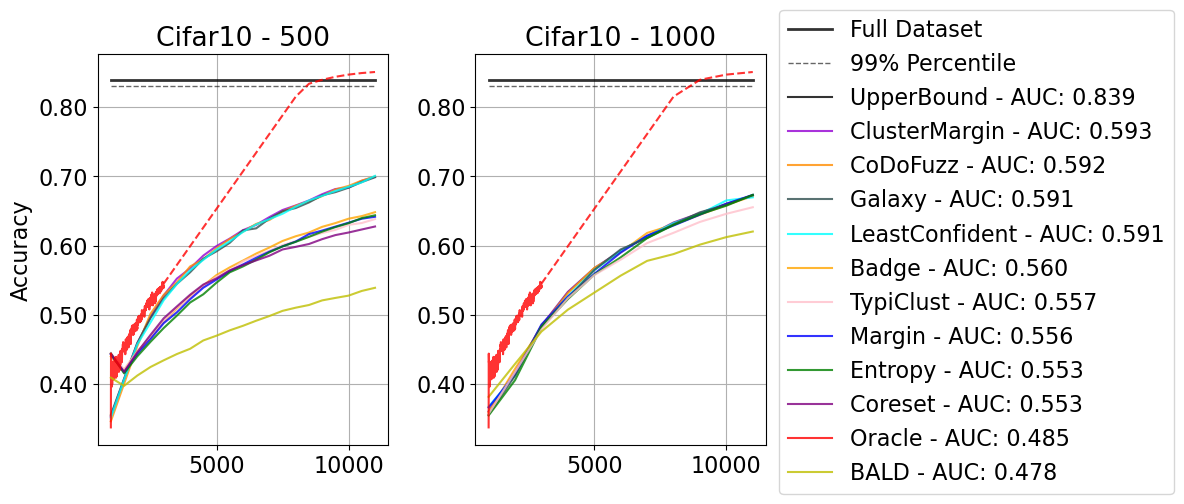

In [2]:
# Oracle, CoreGCN
full_plot("Cifar10", query_size=None, radjust=0.65)
plt.savefig("doc/img/eval_cifar10_new.pdf")
plt.show()

In [8]:
datasets = ["Cifar10","FashionMnist","Splice", "DNA", "USPS", "TopV2", "News", "Mnist"]

for dataset in datasets:
    accuracies = H.full_table(dataset, query_size=None)

    # Combine all DataFrames into one
    df = pd.concat(accuracies, ignore_index=True)

    # Get the row with max accuracy per agent
    max_rows = df.loc[df.groupby("Agent")["Accuracy"].idxmax()]

    # Sort if desired
    max_rows_sorted = max_rows.sort_values(by="Accuracy", ascending=False)

    # Format table
    table_str = tabulate(max_rows_sorted, headers="keys", tablefmt="fancy_grid", showindex=False)

    # Ensure folder exists
    os.makedirs("tables", exist_ok=True)

    # Save to file named after dataset
    output_path = os.path.join("tables", f"{dataset}.txt")
    with open(output_path, "w") as f:
        f.write(table_str)

In [7]:
datasets = ["Cifar10", "FashionMnist", "Splice", "DNA", "USPS", "TopV2", "News", "Mnist"]
query_sizes = [None]  # or whichever query sizes you want
target_strategy = "CoDoFuzz"  # strategy to filter

for dataset in datasets:
    all_results = []

    accuracies = H.full_table(dataset, query_size=None)
    df = pd.concat(accuracies, ignore_index=True)
    # Filter to only keep rows where Agent == target_strategy
    df = df[df["Agent"] == target_strategy]
    # Optionally add a column to indicate query size
    all_results.append(df)

    # Combine results across all query sizes
    final_df = pd.concat(all_results, ignore_index=True)

    # If you still want max over something (though now there is only one agent)
    max_rows = final_df.loc[final_df.groupby("Query Size")["Accuracy"].idxmax()]

    # Sort by query size
    max_rows_sorted = max_rows.sort_values(by="Query Size")

    # Format table
    table_str = tabulate(max_rows_sorted, headers="keys", tablefmt="fancy_grid", showindex=False)

    # Ensure folder exists
    os.makedirs("tables", exist_ok=True)

    # Save to file named after dataset
    output_path = os.path.join("tables", f"{dataset}_{target_strategy}.txt")
    with open(output_path, "w") as f:
        f.write(table_str)


# FashionMnist

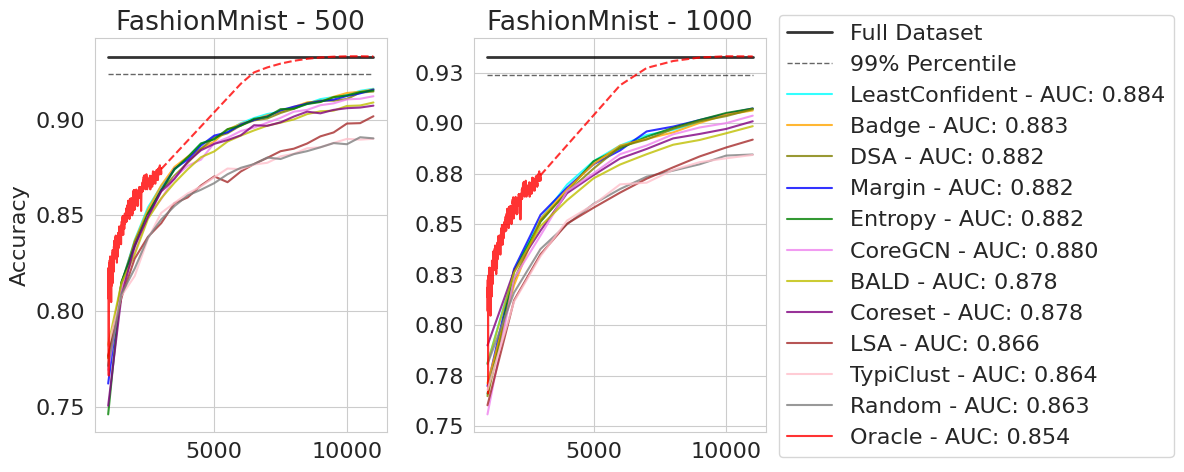

In [33]:
full_plot("FashionMnist", query_size=None, radjust=0.65, forecast_oracle=True)
plt.savefig("doc/img/eval_fmnist.pdf")
plt.show()

# Large Moons   

<Figure size 960x720 with 0 Axes>

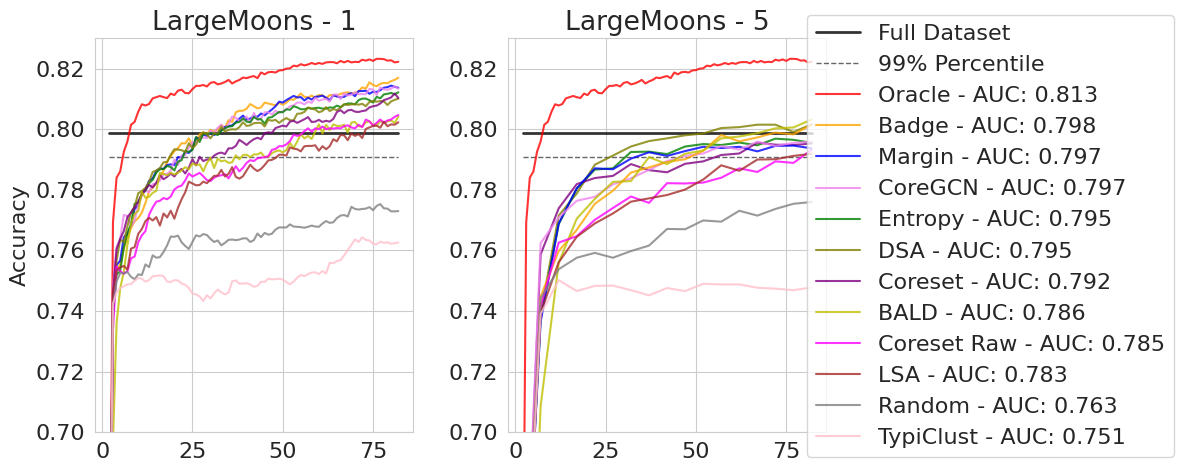

In [15]:
plt.figure(dpi=150)

full_plot("LargeMoons", query_size=None, radjust=0.7, forecast_oracle=False, y_lim=[0.70, 0.83])
plt.show()

# Honeypot

<Figure size 960x720 with 0 Axes>

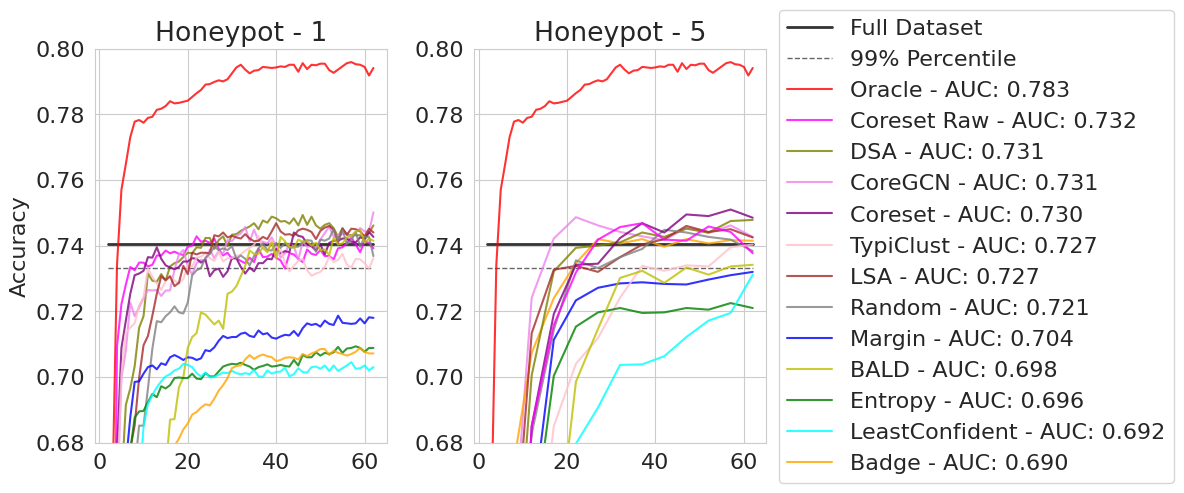

In [2]:
plt.figure(dpi=150)

full_plot("ThreeClust", query_size=None, radjust=0.65, forecast_oracle=False, y_lim=[0.68, 0.8], plot_title="Honeypot")
plt.savefig("doc/img/eval_honeypot.pdf")
plt.show()

# DivergingSin

<Figure size 960x720 with 0 Axes>

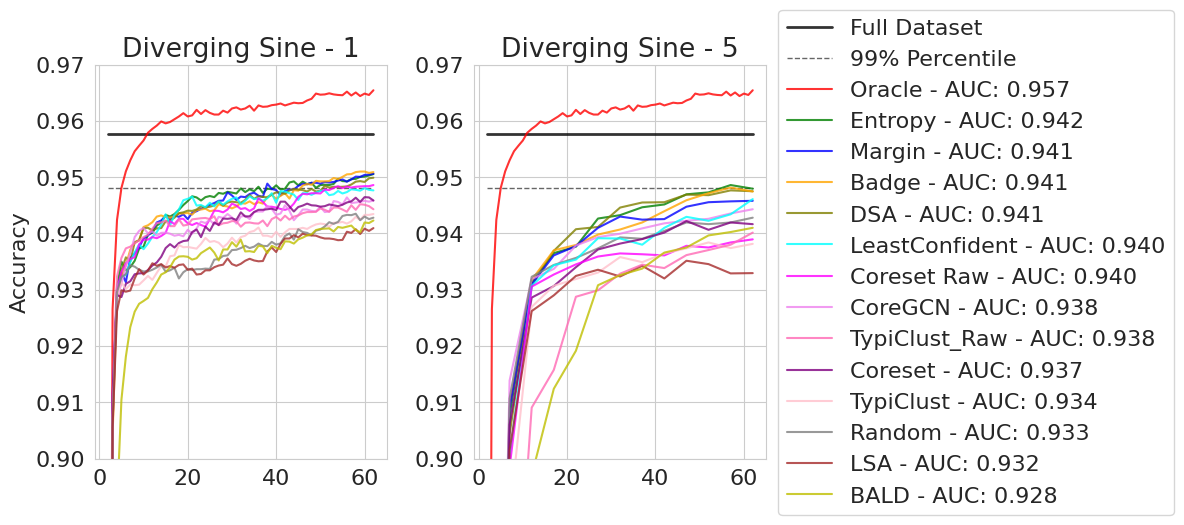

In [3]:
plt.figure(dpi=150)

full_plot("DivergingSin", query_size=None, radjust=0.65, forecast_oracle=False, y_lim=[0.9, 0.97], plot_title="Diverging Sine")
plt.savefig("doc/img/eval_diverging_sine.pdf")
plt.show()

# Comparison Batch AL vs. Single-Sample Al

In [ ]:
create_plot_for_query_size = H._create_plot_for_query_size
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = ax.flatten()
create_plot_for_query_size(ax[0], "ThreeClust", 5, "Test Acc",
                            f"Honeypot", 0.2, False,
                            False, y_lim=[0.65, 0.8])
fig.legend(loc=7)
create_plot_for_query_size(ax[1], "DivergingSin", 5, "",
                            f"Diverging Sin", 0.2, False,
                            False, y_lim=[0.88, 0.97])
fig.tight_layout()
fig.subplots_adjust(right=0.75, hspace=0.2, wspace=0.3)
plt.savefig("doc/img/synth_trajectories.jpg")
plt.show()